Негробов В.А. АС-21-05
13 вариант

Вариант 3.
 ### 3.1
Входные лингвистические переменные:

x – Качество сценария; y – Качество игры актеров;

Выходная лингвистическая переменная:

z – Качество режиссерской работы;

 ### 3.2
Входные лингвистические переменные:

x – Бюджет фильма; y – Уровень спецэффектов;

Выходная лингвистическая переменная:

z – Зрелищность фильма;

 ### 3.3
Входные лингвистические переменные:

x – Качество режиссерской работы; y – Зрелищность фильма;

Выходная лингвистическая переменная:

z – Величина кассовых сборов фильма;

Подключение библиотек:

# Preprocessing

In [1]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from skfuzzy.control import (Antecedent,
                             Consequent,
                             Rule,
                             ControlSystem,
                             ControlSystemSimulation
                             )
import numpy as np

# 3.1

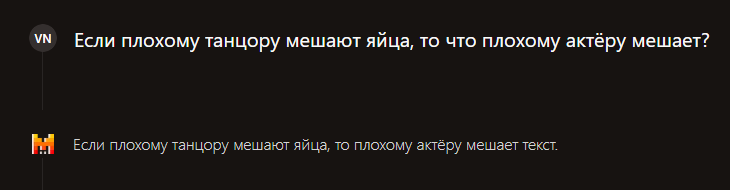

База правил:

Диапазон термов лингвистической переменной x - качество сценария (оцена по десятибальной шкале):
- Терм 1: Плохой (1 - 4)
- Терм 2: Нормальный (5 - 7)
- Терм 3: Хороший (8 - 10)

Диапазон термов лингвистической переменной y - качество игры актёров (оцена в долях текста):
- Терм 1: Хорошая (0.1 - 0.5)
- Терм 2: Нормальная (0.3 - 0.7)
- Терм 3: Плохая (0.5 - 1)

Диапазон термов лингвистической переменной z - качество режиссёрской работы (оцена по десятибальной шкале):
- Терм 1: Плохой (1 - 4)
- Терм 2: Нормальный (3 - 7)
- Терм 3: Хороший (6 - 10)

c:\Users\Viktor\Documents\IT\DecisionTheory\FuzzyLogic\.venv\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


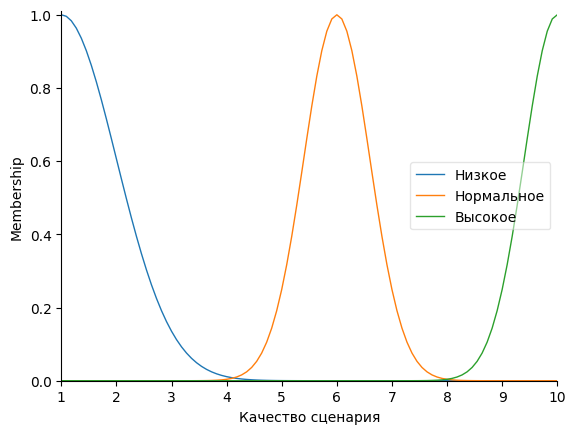

In [2]:
scenario_quality = Antecedent(np.linspace(1, 10, 100), 'Качество сценария')

scenario_quality['Низкое'] = fuzz.gaussmf(scenario_quality.universe, 1, 1)
scenario_quality['Нормальное'] = fuzz.gaussmf(scenario_quality.universe, 6, 0.6)
scenario_quality['Высокое'] = fuzz.gaussmf(scenario_quality.universe, 10, 0.6)

scenario_quality.view()

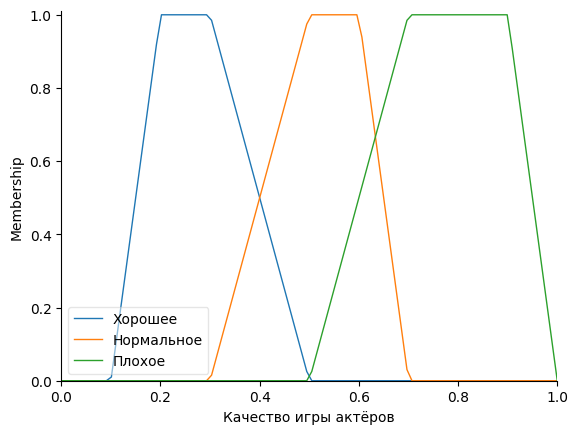

In [3]:
performance_quality = Antecedent(np.linspace(0, 1, 100), 'Качество игры актёров')

performance_quality['Хорошее'] = fuzz.trapmf(performance_quality.universe, [0.1, 0.2, 0.3, 0.5])
performance_quality['Нормальное'] = fuzz.trapmf(performance_quality.universe, [0.3, 0.5, 0.6, 0.7])
performance_quality['Плохое'] = fuzz.trapmf(performance_quality.universe, [0.5, 0.7, 0.9, 1])

performance_quality.view()

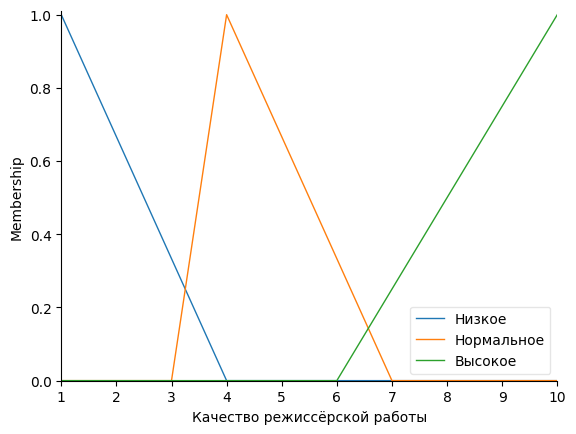

In [4]:
work_quality = Consequent(np.linspace(1, 10, 100), 'Качество режиссёрской работы')

work_quality['Низкое'] = fuzz.trimf(work_quality.universe, [1, 1, 4])
work_quality['Нормальное'] = fuzz.trimf(work_quality.universe, [3, 4, 7])
work_quality['Высокое'] = fuzz.trimf(work_quality.universe, [6, 10, 10])

work_quality.view()

In [5]:
rule1 = Rule(antecedent=scenario_quality['Низкое'], consequent=work_quality['Низкое'])
rule2 = Rule(antecedent=scenario_quality['Нормальное'], consequent=work_quality['Нормальное'])
rule3 = Rule(antecedent=scenario_quality['Высокое'], consequent=work_quality['Высокое'])
rule4 = Rule(antecedent=performance_quality['Плохое'], consequent=work_quality['Низкое'])
rule5 = Rule(antecedent=performance_quality['Нормальное'], consequent=work_quality['Нормальное'])
rule6 = Rule(antecedent=performance_quality['Хорошее'], consequent=work_quality['Высокое'])

In [6]:
work_ctrl = ControlSystem(rules=[rule1, rule2, rule3, rule4, rule5, rule6])
work_counter = ControlSystemSimulation(work_ctrl)

In [7]:
work_counter.input['Качество сценария'] = 9
work_counter.input['Качество игры актёров'] = 0.1
work_counter.compute()

work_counter.output['Качество режиссёрской работы']

np.float64(8.23746515516108)

In [8]:
work_counter.print_state()

 Antecedents 
Antecedent: Качество сценария       = 9
  - Низкое                          : 1.2664165549094176e-14
  - Нормальное                      : 3.726653172078671e-06
  - Высокое                         : 0.24935220877729622
Antecedent: Качество игры актёров   = 0.1
  - Хорошее                         : 0.009090909090909144
  - Нормальное                      : 0.0
  - Плохое                          : 0.0

 Rules 
RULE #0:
  IF Качество сценария[Низкое] THEN Качество режиссёрской работы[Низкое]
	AND aggregation function : fmin
	OR aggregation function  : fmax

  Aggregation (IF-clause):
  - Качество сценария[Низкое]                              : 1.2664165549094176e-14
                                 Качество сценария[Низкое] = 1.2664165549094176e-14
  Activation (THEN-clause):
                      Качество режиссёрской работы[Низкое] : 1.2664165549094176e-14

RULE #1:
  IF Качество сценария[Нормальное] THEN Качество режиссёрской работы[Нормальное]
	AND aggregation function 

# 3.2

База правил:

Диапазон термов лингвистической переменной x - бюджет фильма (в долларах):
- Терм 1: Низкий (0 - 25 000)
- Терм 2: Средний (20 000 - 200 000 000)
- Терм 3: Высокий (100 000 000 - 1 000 000 000)

Диапазон термов лингвистической переменной y - уровень спецэффектов (оценка в долях единицы):
- Терм 1: Нет (0.1 - 0.4)
- Терм 2: Да (0.3 - 0.7)

Диапазон термов лингвистической переменной z - зрелищность фильма (оцена по десятибальной шкале):
- Терм 1: Базовый (1 - 4)
- Терм 2: Зрелищный (3 - 7)
- Терм 3: Крышесносный (6 - 10)

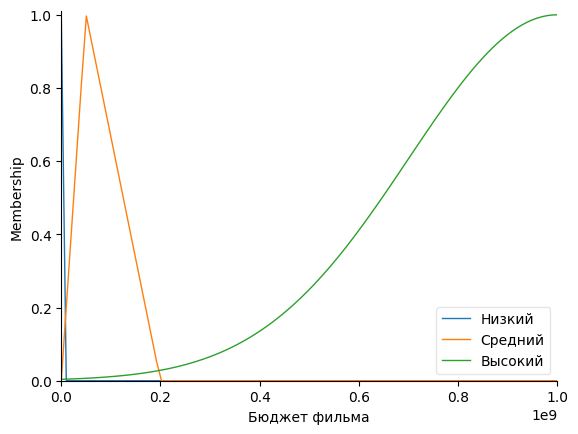

In [9]:
budget = Antecedent(np.linspace(0, 1_000_000_000, 100), 'Бюджет фильма')

budget['Низкий'] = fuzz.gaussmf(budget.universe, 0, 10_000)
budget['Средний'] = fuzz.trimf(budget.universe, [20_000, 50_000_000, 200_000_000])
budget['Высокий'] = fuzz.gaussmf(budget.universe, 1_000_000_000, 300_000_000)

budget.view()

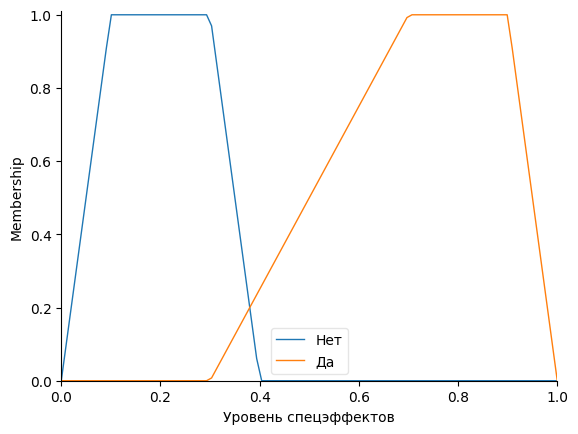

In [10]:
special_effects = Antecedent(np.linspace(0, 1, 100), 'Уровень спецэффектов')

special_effects['Нет'] = fuzz.trapmf(special_effects.universe, [0.0, 0.1, 0.3, 0.4])
special_effects['Да'] = fuzz.trapmf(special_effects.universe, [0.3, 0.7, 0.9, 1])

special_effects.view()

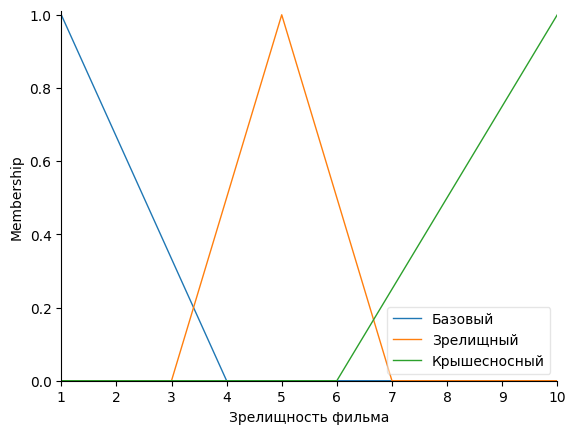

In [11]:
entertainment = Consequent(np.linspace(1, 10, 100), 'Зрелищность фильма')

entertainment['Базовый'] = fuzz.trimf(entertainment.universe, [1, 1, 4])
entertainment['Зрелищный'] = fuzz.trimf(entertainment.universe, [3, 5, 7])
entertainment['Крышесносный'] = fuzz.trimf(entertainment.universe, [6, 10, 10])

entertainment.view()

In [12]:
rule11 = Rule(antecedent=budget['Низкий'], consequent=entertainment['Базовый'])
rule21 = Rule(antecedent=budget['Средний'], consequent=entertainment['Зрелищный'])
rule31 = Rule(antecedent=budget['Высокий'], consequent=entertainment['Крышесносный'])
rule41 = Rule(antecedent=special_effects['Нет'], consequent=entertainment['Базовый'])
rule51 = Rule(antecedent=special_effects['Да'], consequent=entertainment['Крышесносный'])

In [13]:
entertainment_ctrl = ControlSystem(rules=[rule11, rule21, rule31, rule41, rule51])
entertainment_counter = ControlSystemSimulation(entertainment_ctrl)

In [14]:
entertainment_counter.input['Бюджет фильма'] = 0
entertainment_counter.input['Уровень спецэффектов'] = 0
entertainment_counter.compute()

entertainment_counter.output['Зрелищность фильма']

np.float64(2.06114577039564)

In [15]:
entertainment_counter.print_state()

 Antecedents 
Antecedent: Бюджет фильма           = 0
  - Низкий                          : 1.0
  - Средний                         : 0.0
  - Высокий                         : 0.0038659201394728076
Antecedent: Уровень спецэффектов    = 0
  - Нет                             : 0.0
  - Да                              : 0.0

 Rules 
RULE #0:
  IF Бюджет фильма[Низкий] THEN Зрелищность фильма[Базовый]
	AND aggregation function : fmin
	OR aggregation function  : fmax

  Aggregation (IF-clause):
  - Бюджет фильма[Низкий]                                  : 1.0
                                     Бюджет фильма[Низкий] = 1.0
  Activation (THEN-clause):
                               Зрелищность фильма[Базовый] : 1.0

RULE #1:
  IF Бюджет фильма[Средний] THEN Зрелищность фильма[Зрелищный]
	AND aggregation function : fmin
	OR aggregation function  : fmax

  Aggregation (IF-clause):
  - Бюджет фильма[Средний]                                 : 0.0
                                    Бюджет фильма[С

# 3.3

Диапазон термов лингвистической переменной z - Величина кассовых сборов фильма (в млн долларах):
- Терм 1: Низкий (0 - 50)
- Терм 2: Средний (30 - 700 000)
- Терм 3: Высокий (600 000 - 1 000 000 000)

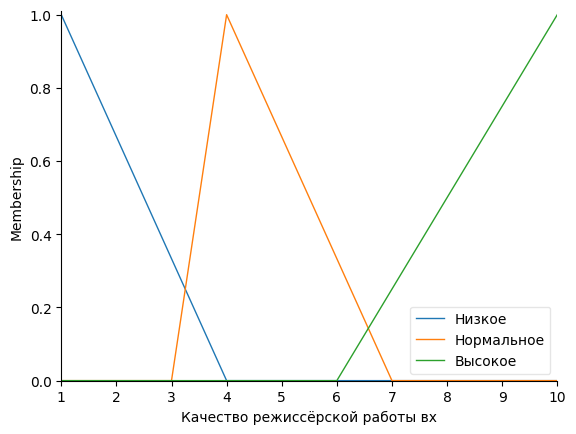

In [16]:
work_quality_inp = Antecedent(np.linspace(1, 10, 100), 'Качество режиссёрской работы вх')

work_quality_inp['Низкое'] = fuzz.trimf(work_quality_inp.universe, [1, 1, 4])
work_quality_inp['Нормальное'] = fuzz.trimf(work_quality_inp.universe, [3, 4, 7])
work_quality_inp['Высокое'] = fuzz.trimf(work_quality_inp.universe, [6, 10, 10])

work_quality_inp.view()

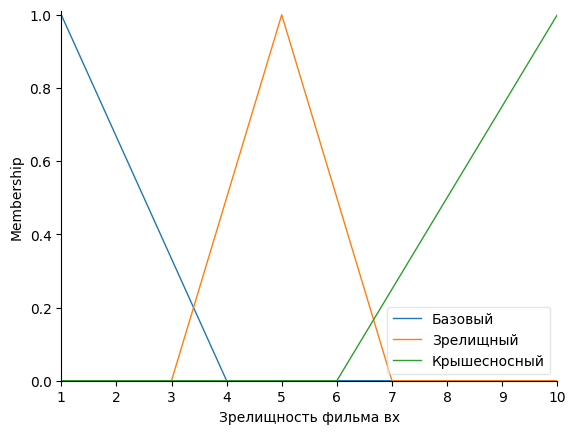

In [17]:
entertainment_inp = Antecedent(np.linspace(1, 10, 100), 'Зрелищность фильма вх')

entertainment_inp['Базовый'] = fuzz.trimf(entertainment_inp.universe, [1, 1, 4])
entertainment_inp['Зрелищный'] = fuzz.trimf(entertainment_inp.universe, [3, 5, 7])
entertainment_inp['Крышесносный'] = fuzz.trimf(entertainment_inp.universe, [6, 10, 10])

entertainment_inp.view()

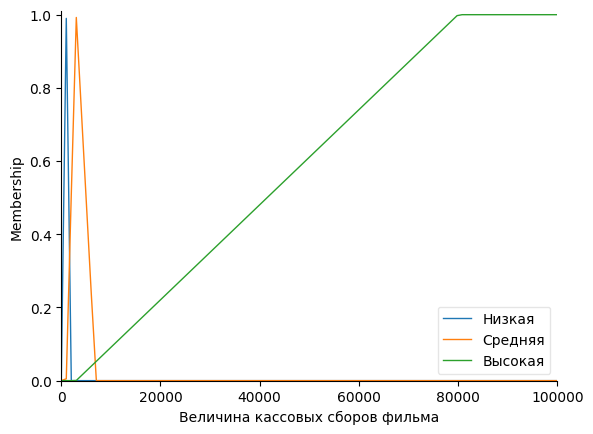

In [18]:
box_office = Consequent(np.linspace(0, 100_000, 100), 'Величина кассовых сборов фильма')

box_office['Низкая'] = fuzz.trimf(box_office.universe, [0, 1_000, 2_000])
box_office['Средняя'] = fuzz.trimf(box_office.universe, [1_000, 3_000, 7_000])
box_office['Высокая'] = fuzz.trapmf(box_office.universe, [3_000, 80_000, 100_000, 100_000])

box_office.view()

In [19]:
rule12 = Rule(antecedent=work_quality_inp['Низкое'], consequent=box_office['Низкая'])
rule22 = Rule(antecedent=work_quality_inp['Нормальное'], consequent=box_office['Средняя'])
rule32 = Rule(antecedent=work_quality_inp['Высокое'], consequent=box_office['Высокая'])
rule42 = Rule(antecedent=entertainment_inp['Базовый'], consequent=box_office['Низкая'])
rule52 = Rule(antecedent=entertainment_inp['Зрелищный'], consequent=box_office['Средняя'])
rule62 = Rule(antecedent=entertainment_inp['Крышесносный'], consequent=box_office['Высокая'])

In [20]:
box_office_ctrl = ControlSystem(rules=[rule12, rule22, rule32, rule42, rule52, rule62])
box_office_counter = ControlSystemSimulation(box_office_ctrl)

In [21]:
box_office_counter.input['Качество режиссёрской работы вх'] = 10
box_office_counter.input['Зрелищность фильма вх'] = 10
box_office_counter.compute()

box_office_counter.output['Величина кассовых сборов фильма']

np.float64(66526.60731321234)

In [22]:
box_office_counter.print_state()

 Antecedents 
Antecedent: Качество режиссёрской работы вх = 10
  - Низкое                          : 0.0
  - Нормальное                      : 0.0
  - Высокое                         : 1.0
Antecedent: Зрелищность фильма вх   = 10
  - Базовый                         : 0.0
  - Зрелищный                       : 0.0
  - Крышесносный                    : 1.0

 Rules 
RULE #0:
  IF Качество режиссёрской работы вх[Низкое] THEN Величина кассовых сборов фильма[Низкая]
	AND aggregation function : fmin
	OR aggregation function  : fmax

  Aggregation (IF-clause):
  - Качество режиссёрской работы вх[Низкое]                : 0.0
                   Качество режиссёрской работы вх[Низкое] = 0.0
  Activation (THEN-clause):
                   Величина кассовых сборов фильма[Низкая] : 0.0

RULE #1:
  IF Качество режиссёрской работы вх[Нормальное] THEN Величина кассовых сборов фильма[Средняя]
	AND aggregation function : fmin
	OR aggregation function  : fmax

  Aggregation (IF-clause):
  - Качество режиссё

# Working with functions

In [23]:
def in_range(value, least, great):
    if least is None and great is None:
        return True
    elif least is None and value <= great:
        return True
    elif least <= value and great is None:
        return True
    elif least <= value <= great:
        return True
    return False


def convert_value(value, type_cast=float):
    try:
        return type_cast(value)
    except ValueError:
        return None
    
def input_value(least, great, message):
    value = input(message + ': ')
    casted_value = convert_value(value)
    if casted_value is None:
        raise ValueError('Incorrect input')
    if not in_range(casted_value, least, great):
        raise ValueError('Incorrect input')
    return casted_value

In [24]:
def get_counter_function(work_counter, entertainment_counter, box_office_counter):
    def count_value():
        nonlocal work_counter
        nonlocal entertainment_counter
        nonlocal box_office_counter
        
        work_counter.input['Качество сценария'] = input_value(0, 10, 'Введите качество сценария (0 - 10)')
        work_counter.input['Качество игры актёров'] = input_value(0, 10, 'Введите качество игры актёров (0 - 1)')
        work_counter.compute()

        work_quality = float(work_counter.output['Качество режиссёрской работы'])

        entertainment_counter.input['Бюджет фильма'] = input_value(0, 1_000_000_000, 'Введите бюджет фильма в долларах (0 - 1 000 000 000)')
        entertainment_counter.input['Уровень спецэффектов'] = input_value(0, 1, 'Введите уровень спецэффектов (0 - 1)')
        entertainment_counter.compute()

        entertainment_value = float(entertainment_counter.output['Зрелищность фильма'])

        box_office_counter.input['Качество режиссёрской работы вх'] = work_quality
        box_office_counter.input['Зрелищность фильма вх'] = entertainment_value
        box_office_counter.compute()

        return float(box_office_counter.output['Величина кассовых сборов фильма'])

    return count_value

In [25]:
count_box_office = get_counter_function(work_counter, entertainment_counter, box_office_counter)

while True:
    try:
        print(count_box_office() * 1_000_000)
        break
    except Exception as e:
        print(e)

3295407589.02373
